<a href="https://colab.research.google.com/github/Nishaj02/Project-work/blob/main/Mechademy_Ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Time Handling
import datetime

# System and Warnings
import os
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/data.csv', on_bad_lines='skip') # Skip problematic lines


In [ ]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [ ]:
df.shape

(20508, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20508 entries, 0 to 20507
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     20508 non-null  object 
 1   equipment_energy_consumption  19483 non-null  object 
 2   lighting_energy               19522 non-null  object 
 3   zone1_temperature             19458 non-null  object 
 4   zone1_humidity                19546 non-null  object 
 5   zone2_temperature             19476 non-null  object 
 6   zone2_humidity                19463 non-null  float64
 7   zone3_temperature             19532 non-null  float64
 8   zone3_humidity                19430 non-null  float64
 9   zone4_temperature             19498 non-null  float64
 10  zone4_humidity                19555 non-null  float64
 11  zone5_temperature             19493 non-null  float64
 12  zone5_humidity                19537 non-null  float64
 13  z

In [ ]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,19463.000000,19532.000000,19430.000000,19498.000000,19555.000000,19493.000000,19537.000000,19465.000000,19479.000000,19559.000000,...,19577.000000,19426.000000,19528.000000,19480.000000,19557.000000,19482.000000,19513.000000,19522.000000,19512.000000,19522.000000
mean,39.287642,21.597203,37.841653,20.226293,37.470509,18.991569,49.924548,6.264322,58.271553,19.681402,...,18.866214,39.943363,6.035812,755.929189,78.961808,4.080902,38.620357,2.588010,24.918951,25.059079
std,10.170397,2.553234,10.086770,2.814043,10.481958,2.323126,18.605372,8.741878,51.572171,2.837540,...,2.482138,10.943137,7.461949,14.847453,28.439498,4.400169,21.692812,6.043552,25.933001,25.716733
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,5.794949,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.723333,20.500000,36.500000,19.290000,34.900000,18.060000,45.090000,2.863333,37.626667,18.500000,...,17.890000,38.026667,2.950000,750.600000,71.000000,2.000000,28.666667,0.333333,12.216526,12.236568
50%,40.090000,21.698571,38.000000,20.290000,37.223333,18.890000,48.260000,6.090000,61.993333,19.600000,...,18.926667,39.966667,5.766667,756.400000,84.000000,3.666667,40.000000,2.433333,24.883977,24.855067
75%,42.590000,22.600000,40.433333,21.290000,40.590000,20.000000,53.326667,9.463333,82.951944,20.890000,...,19.856667,42.900000,8.850000,762.400000,91.833333,5.666667,40.166667,4.900000,37.908119,37.939323
max,77.265503,36.823982,71.406273,92.156667,81.446225,44.205000,141.640143,55.932271,353.393026,48.400000,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [ ]:
# Step 1: Convert all object columns to numeric where possible
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

In [ ]:
# Step 2: Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [ ]:
# Step 3: Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [ ]:
# Step 4: Set negative values in energy columns to NaN
energy_columns = [col for col in df.columns if "energy" in col]
for col in energy_columns:
    df.loc[df[col] < 0, col] = np.nan

In [ ]:
# Step 5: Fill missing numeric values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
#  Check if all missing values are handled
print(df.isnull().sum().sort_values(ascending=False).head(10))

timestamp                       20508
month                           20508
dayofweek                       20508
day                             20508
hour                            20508
equipment_energy_consumption        0
lighting_energy                     0
zone1_temperature                   0
zone1_humidity                      0
zone4_temperature                   0
dtype: int64


In [ ]:
# Set plot style
sns.set(style="whitegrid", palette="pastel")

In [ ]:
# 1. Basic Statistics
print(df.describe())

      timestamp  equipment_energy_consumption  lighting_energy  \
count         0                  20508.000000     20508.000000   
mean        NaT                    109.220785         4.973646   
min         NaT                     10.000000         0.000000   
25%         NaT                     50.000000         0.000000   
50%         NaT                     60.000000         0.000000   
75%         NaT                    109.220785         4.973646   
max         NaT                   1139.985693        86.002966   
std         NaN                    144.455511        11.430978   

       zone1_temperature  zone1_humidity  zone2_temperature  zone2_humidity  \
count       20508.000000    20508.000000       20508.000000    20508.000000   
mean           21.227621       38.677608          19.657600       39.287642   
min             8.726818      -46.660000           2.988199      -77.265503   
25%            20.600000       36.900000          18.533333       37.900000   
50%       

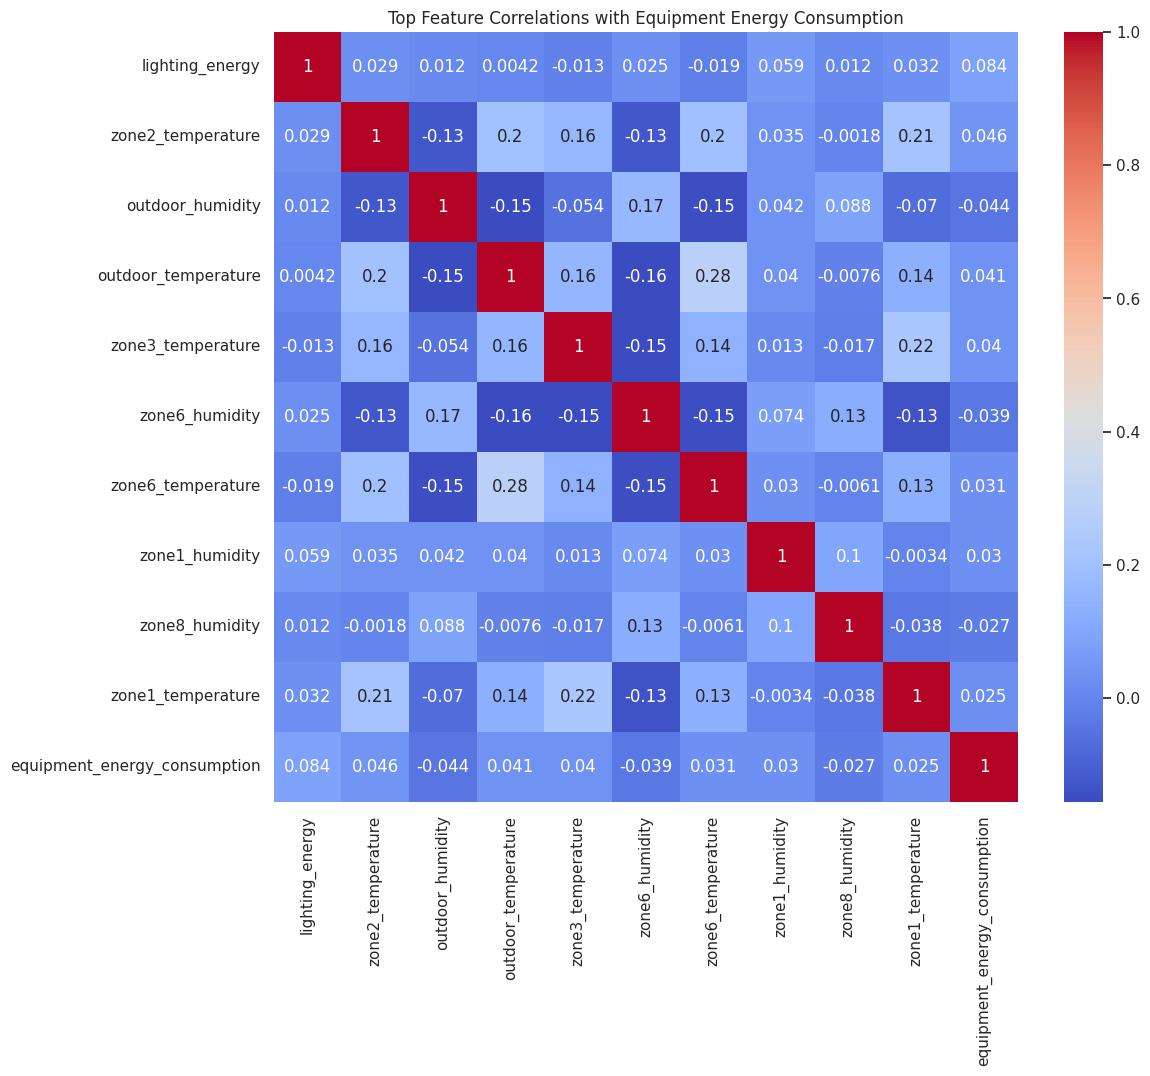

In [ ]:
# 2. Correlation Heatmap (Top correlated features with energy consumption)
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
top_corr = corr['equipment_energy_consumption'].abs().sort_values(ascending=False)[1:11]
sns.heatmap(df[top_corr.index.tolist() + ['equipment_energy_consumption']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with Equipment Energy Consumption")
plt.show()

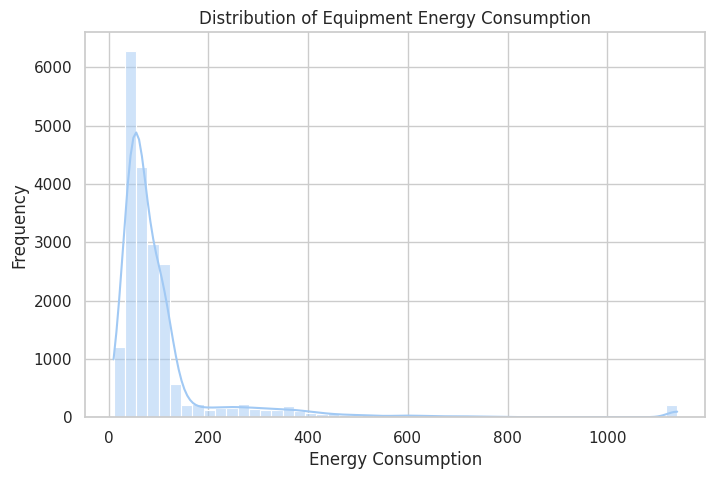

In [ ]:
# 3. Distribution of Energy Consumption
plt.figure(figsize=(8, 5))
sns.histplot(df['equipment_energy_consumption'], bins=50, kde=True)
plt.title("Distribution of Equipment Energy Consumption")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()

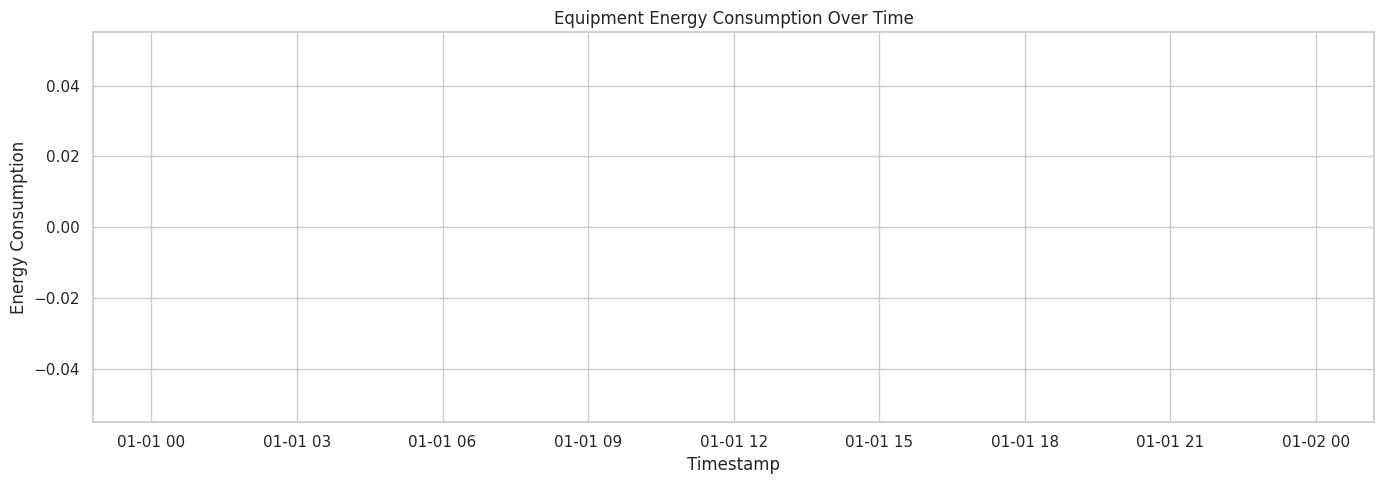

In [ ]:
# 4. Energy Consumption Over Time
plt.figure(figsize=(14, 5))
df_sorted = df.sort_values('timestamp')
plt.plot(df_sorted['timestamp'], df_sorted['equipment_energy_consumption'], label='Energy Consumption', color='blue')
plt.title("Equipment Energy Consumption Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()

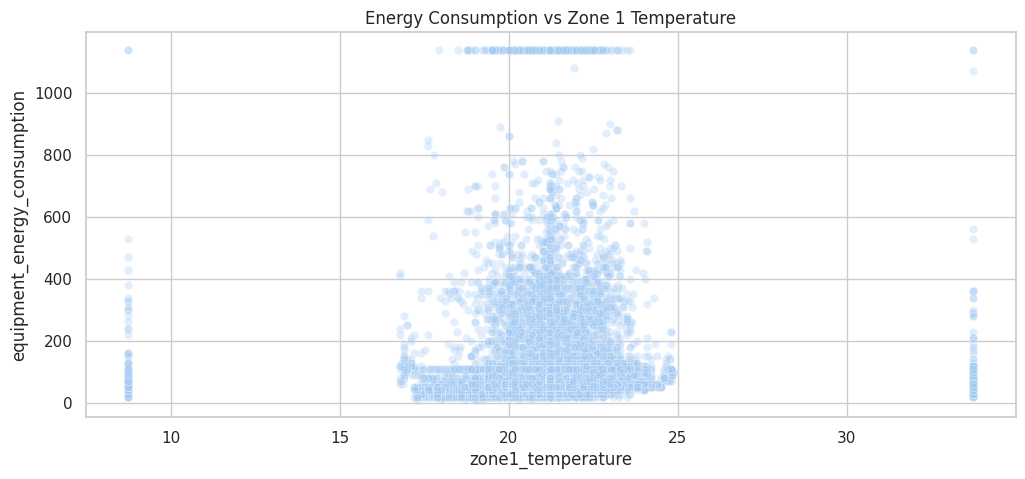

In [ ]:
# 5. Relationship with Temperature and Humidity
plt.figure(figsize=(12, 5))
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df, alpha=0.3)
plt.title("Energy Consumption vs Zone 1 Temperature")
plt.show()

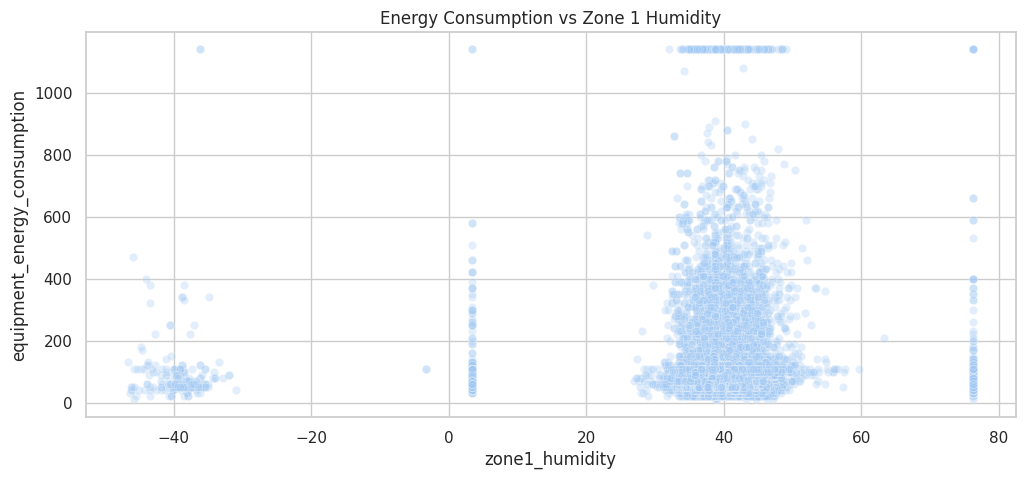

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='zone1_humidity', y='equipment_energy_consumption', data=df, alpha=0.3)
plt.title("Energy Consumption vs Zone 1 Humidity")
plt.show()

In [ ]:
# 1. Already extracted time-based features: 'hour', 'day', 'dayofweek', 'month'
# Let's confirm they are present
print("Time features:", ['hour', 'day', 'dayofweek', 'month'])

Time features: ['hour', 'day', 'dayofweek', 'month']


In [ ]:
# 2. Create average temperature and humidity across zones
temperature_cols = [col for col in df.columns if "temperature" in col and "zone" in col]
humidity_cols = [col for col in df.columns if "humidity" in col and "zone" in col]
df['avg_zone_temperature'] = df[temperature_cols].mean(axis=1)
df['avg_zone_humidity'] = df[humidity_cols].mean(axis=1)


In [ ]:
# 3. Create interaction features
df['temp_humidity_interaction'] = df['avg_zone_temperature'] * df['avg_zone_humidity']

In [ ]:
# 4. Optional: Total energy (if more than one energy metric is tracked)
energy_cols = [col for col in df.columns if "energy" in col]
df['total_energy'] = df[energy_cols].sum(axis=1)

In [ ]:
# 5. Optional: Normalize selected features (useful for some ML models)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['avg_zone_temperature_scaled', 'avg_zone_humidity_scaled']] = scaler.fit_transform(
    df[['avg_zone_temperature', 'avg_zone_humidity']]
)

In [ ]:
# Preview the new engineered features
df[['avg_zone_temperature', 'avg_zone_humidity', 'temp_humidity_interaction', 'total_energy']].head()

,avg_zone_temperature,avg_zone_humidity,temp_humidity_interaction,total_energy
0,18.622326,50.145369,933.823388,64.973646
1,17.149630,49.929776,856.277163,90.000000
2,19.194746,50.628889,971.808658,80.000000
3,18.755137,55.663222,1043.971381,90.000000
4,15.679242,50.732963,795.454401,100.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [ ]:
# 1. Define features (X) and target (y)
feature_cols = [
    'hour', 'dayofweek', 'month',
    'avg_zone_temperature', 'avg_zone_humidity',
    'temp_humidity_interaction', 'lighting_energy'
]

X = df[feature_cols]
y = df['equipment_energy_consumption']


In [ ]:
# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Impute missing values with the mean for all models
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    model.fit(X_train_imputed, y_train) # Use imputed data for training
    y_pred = model.predict(X_test_imputed) # Use imputed data for prediction

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")


Linear Regression
RMSE: 147.97
MAE: 74.22
R² Score: -0.00

Random Forest
RMSE: 128.33
MAE: 63.73
R² Score: 0.25

Gradient Boosting
RMSE: 146.21
MAE: 73.17
R² Score: 0.02


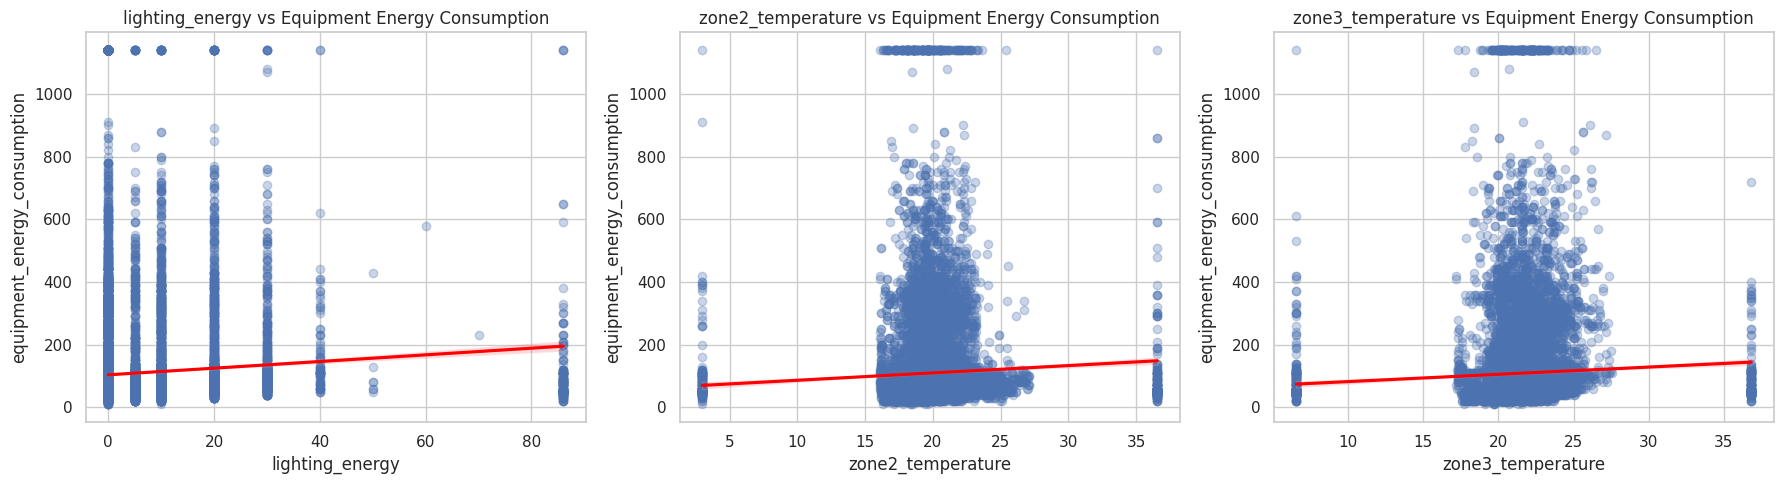

In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Define the top 3 features based on earlier correlation
top_3_features = ['lighting_energy', 'zone2_temperature', 'zone3_temperature']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(top_3_features):
    sns.regplot(data=df, x=feature, y='equipment_energy_consumption',
                ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[i].set_title(f'{feature} vs Equipment Energy Consumption')

plt.tight_layout()
plt.show()

**# Key Findings:**

1. Lighting Energy (Correlation: 0.057):

Weakly but positively correlated with equipment energy consumption.

Suggests that higher lighting use may be associated with higher equipment activity or occupancy.

2. Zone Temperatures (Top: Zone 2, 3, 6):

Several zones' temperatures show a mild positive correlation (0.03–0.04 range).

Implies that warmer indoor temperatures might slightly influence equipment usage.

3. Outdoor Temperature (Correlation: 0.033):

Suggests some indirect influence—possibly due to HVAC systems or thermal load on equipment.

4. Humidity, Pressure, and Wind Speed:

Mostly negligible correlations.

Not major contributors to energy consumption based on this data.


**Recommendations: **


1. Optimize Lighting Usage:

Install motion sensors or smart lighting to reduce unnecessary usage.

Upgrade to energy-efficient lighting systems (e.g., LED).

2. Implement Smart HVAC Controls:

Since zone temperatures mildly correlate with equipment energy use, maintaining optimal temperatures through smart thermostats may reduce load.



3. Schedule Energy-Intensive Equipment During Cooler Periods:

Slight link to outdoor temperature suggests shifting operations to cooler parts of the day could help.



4. Investigate High-Consumption Zones:

Conduct zone-level audits to identify inefficient equipment or environmental conditions causing higher energy draw.



5. Improve Data Quality for Deeper Insights:

Some data inconsistencies and missing values may be hiding stronger trends.

Cleaning and completing the dataset can improve model accuracy for predictive analytics.

